In [0]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [0]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 17kB/s 
     |████████████████████████████████| 3.8MB 42.8MB/s 
     |████████████████████████████████| 450kB 58.2MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.is_gpu_available())

2.1.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [0]:
import numpy as np
import matplotlib.pyplot as plt

데이터 적재


In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
NUM_CLASSES = 10

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [0]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
y_train.shape

(50000, 10)

In [1]:
input_layer = tf.keras.layers.Input(shape=(32,32,3))

x=tf.keras.layers.Flatten()(input_layer)
x=tf.keras.layers.Dense(200,activation = 'relu')(x)
x=tf.keras.layers.Dense(150,activation = 'relu')(x)

output_layer = tf.keras.layers.Dense(10,activation = 'softmax')(x)

model = tf.keras.Model(input_layer, output_layer)

model.summary()

NameError: ignored

In [0]:
opt=tf.keras.optimizers.Adam(lr=0.0005)
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(x_train,y_train,batch_size=32,epochs=10,shuffle=True)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 131us/sample - loss: 2.0289 - accuracy: 0.2510
Epoch 2/10
50000/50000 [==============================] - 5s 97us/sample - loss: 1.8790 - accuracy: 0.3229
Epoch 3/10
50000/50000 [==============================] - 5s 94us/sample - loss: 1.8099 - accuracy: 0.3495
Epoch 4/10
50000/50000 [==============================] - 5s 95us/sample - loss: 1.7558 - accuracy: 0.3674
Epoch 5/10
50000/50000 [==============================] - 5s 97us/sample - loss: 1.7078 - accuracy: 0.3830
Epoch 6/10
50000/50000 [==============================] - 5s 97us/sample - loss: 1.6712 - accuracy: 0.3970
Epoch 7/10
50000/50000 [==============================] - 5s 95us/sample - loss: 1.6392 - accuracy: 0.4112
Epoch 8/10
50000/50000 [==============================] - 5s 96us/sample - loss: 1.6116 - accuracy: 0.4212
Epoch 9/10
50000/50000 [==============================] - 5s 96us/sample - loss: 1.5887 - accuracy: 0.4323
Epoch 10/10
5

모델 평가

In [0]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 88us/sample - loss: 1.5502 - accuracy: 0.4542


[1.5502188144683837, 0.4542]

In [0]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

[8455  289 4434 7511 9736 6769 8221 5265 9162 6832]


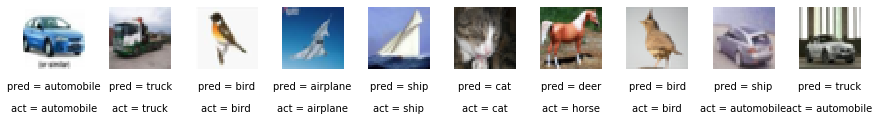

In [0]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
print(indices)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img*255)
